# TASK #1: Traffic Sign Classification


- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }


# TASK #2: IMPORT LIBRARIES/DATASETS

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [38]:
with open("/content/drive/My Drive/Colab Notebooks/Traffic Sign Classification CNN/Traffic sign Data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/drive/My Drive/Colab Notebooks/Traffic Sign Classification CNN/Traffic sign Data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/drive/My Drive/Colab Notebooks/Traffic Sign Classification CNN/Traffic sign Data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [39]:
X_train, y_train = train["features"], train["labels"]
X_valid, y_valid = valid["features"], valid["labels"]
X_test, y_test = test["features"], test["labels"]

In [40]:
X_train.shape
#X_valid.shape
#X_test.shape

(34799, 32, 32, 3)

In [41]:
y_train.shape
#y_valid.shape
#y_test.shape

(34799,)

# TASK #3: PERFORM IMAGES VISUALIZATION

10

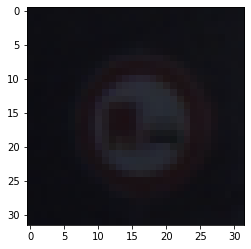

In [42]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

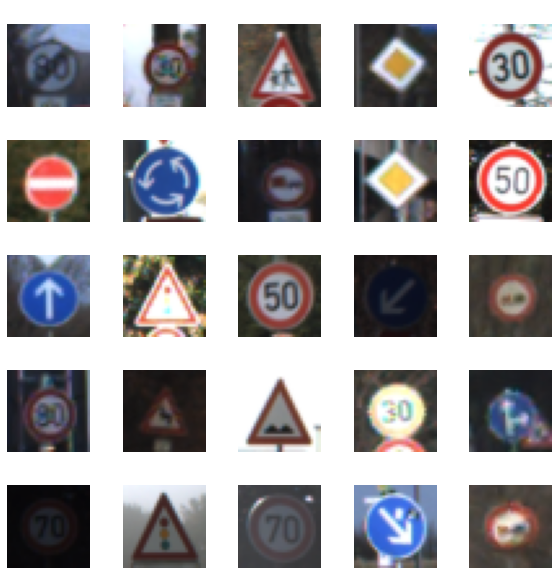

In [43]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid * L_grid):
    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15, color = "white")
    axes[i].axis("off")

plt.subplots_adjust(hspace = 0.4)
        

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [44]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [45]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_valid_gray = np.sum(X_valid/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)

In [46]:
X_train_gray.shape
#X_valid_gray.shape
#X_test_gray.shape

(34799, 32, 32, 1)

In [47]:
X_train_gray_norm = (X_train_gray - 128)/128
X_valid_gray_norm = (X_valid_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128

In [48]:
#X_train_gray_norm
#X_valid_gray_norm
#X_test_gray_norm

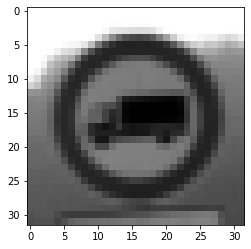

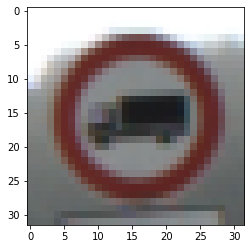

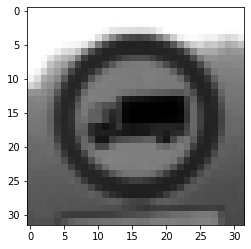

In [49]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# TASK #5: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [50]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5, 5), activation = 'relu', input_shape = (32, 32, 1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.3))

CNN.add(layers.Conv2D(16, (5, 5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dense(43, activation = 'softmax'))

CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)              

# TASK #6: COMPILE AND TRAIN DEEP CNN MODEL

In [51]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [52]:
history = CNN.fit(X_train_gray_norm, y_train, batch_size = 512, epochs = 100, verbose = 1, 
                 validation_data = (X_valid_gray_norm, y_valid))

Epoch 1/100
68/68 [==============================] - 1s 14ms/step - loss: 3.2523 - accuracy: 0.1619 - val_loss: 2.7822 - val_accuracy: 0.2776
Epoch 2/100
68/68 [==============================] - 1s 10ms/step - loss: 1.8926 - accuracy: 0.4871 - val_loss: 1.4162 - val_accuracy: 0.5984
Epoch 3/100
68/68 [==============================] - 1s 10ms/step - loss: 1.1209 - accuracy: 0.6773 - val_loss: 0.9379 - val_accuracy: 0.7302
Epoch 4/100
68/68 [==============================] - 1s 10ms/step - loss: 0.8330 - accuracy: 0.7593 - val_loss: 0.7514 - val_accuracy: 0.7909
Epoch 5/100
68/68 [==============================] - 1s 10ms/step - loss: 0.7123 - accuracy: 0.7945 - val_loss: 0.6634 - val_accuracy: 0.8082
Epoch 6/100
68/68 [==============================] - 1s 10ms/step - loss: 0.6196 - accuracy: 0.8174 - val_loss: 0.6547 - val_accuracy: 0.8188
Epoch 7/100
68/68 [==============================] - 1s 10ms/step - loss: 0.5469 - accuracy: 0.8396 - val_loss: 0.5755 - val_accuracy: 0.8367
Epoch 

# TASK #7: ASSESS TRAINED CNN MODEL PERFORMANCE 

In [53]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 0.6639 - accuracy: 0.9133
Test Accuracy: 0.9133016467094421


In [54]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [55]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

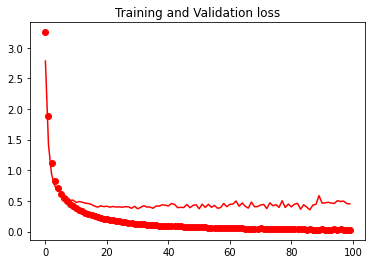

In [56]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation accuracy')

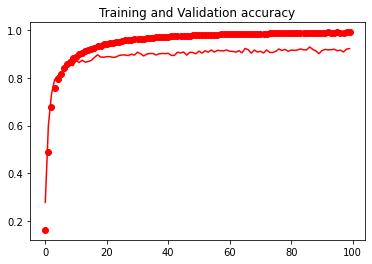

In [57]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label = 'Training Loss')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation Loss')
plt.title('Training and Validation accuracy')

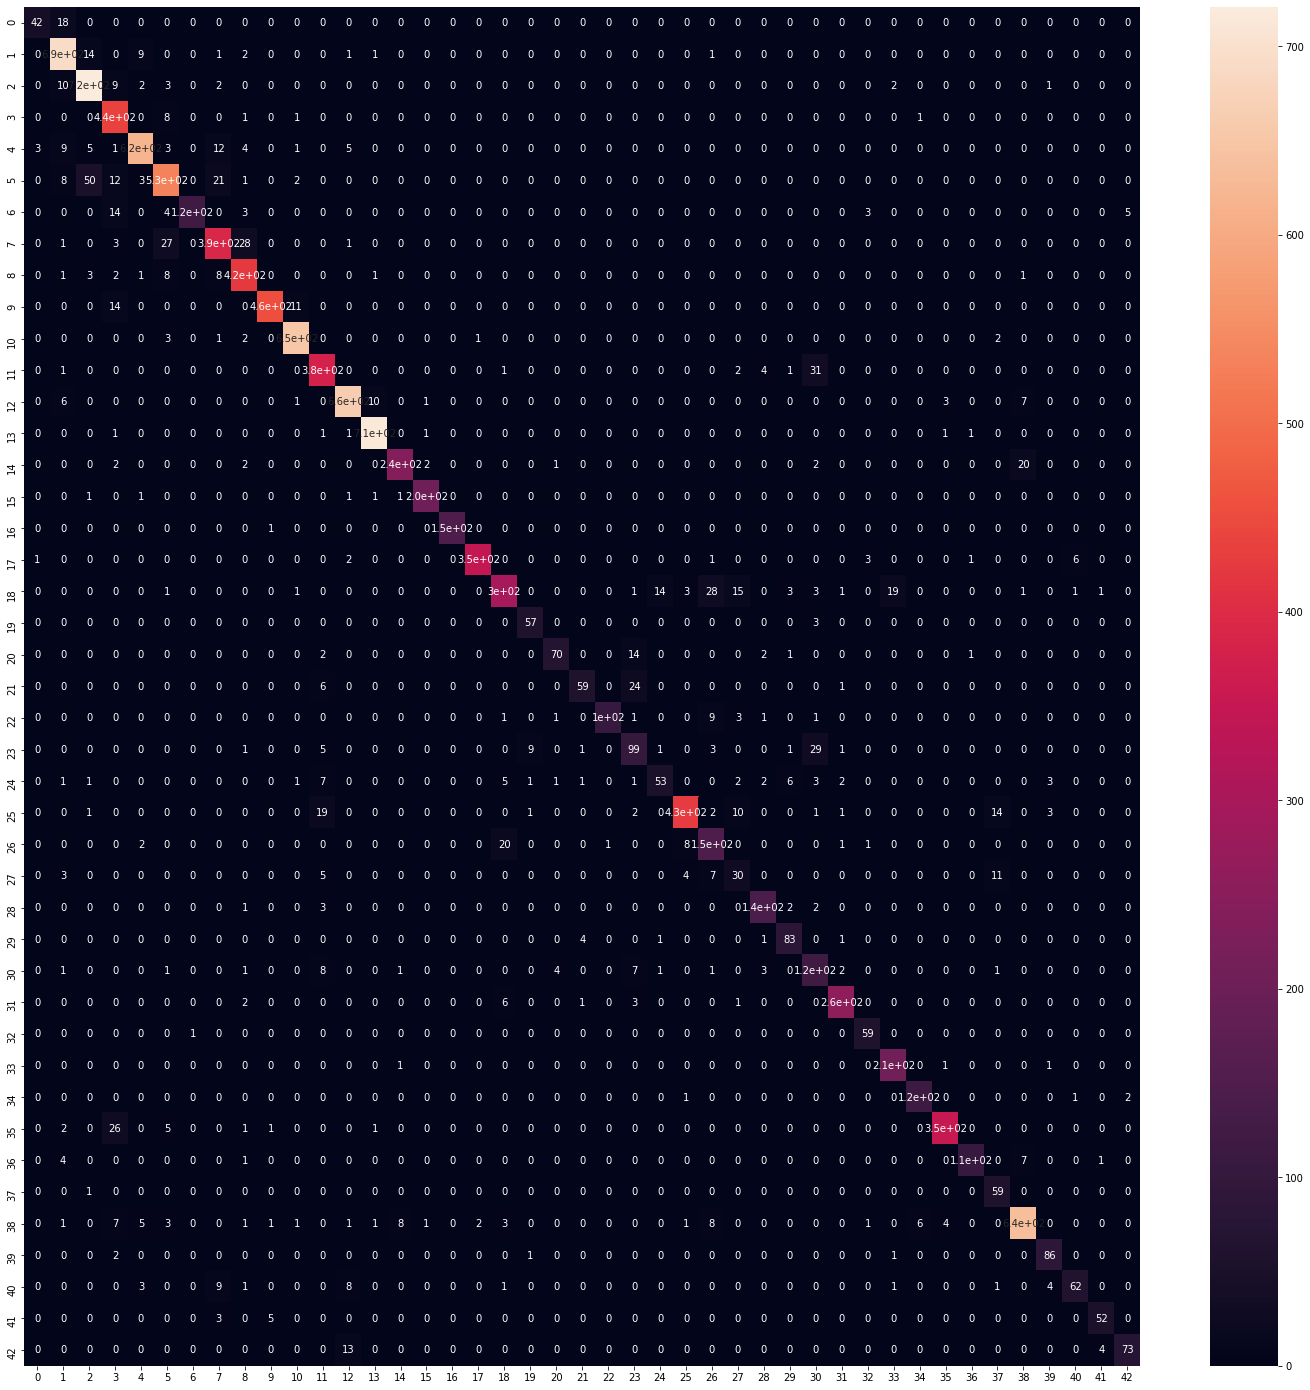

In [58]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

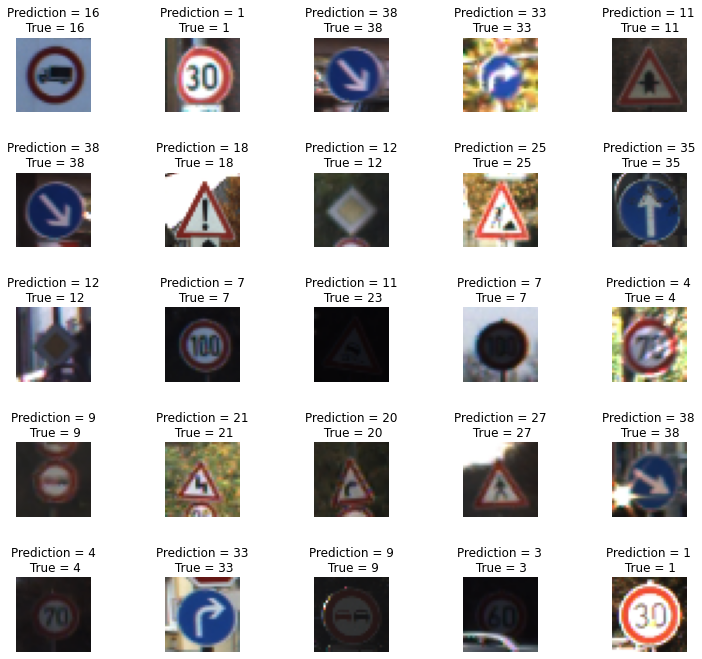

In [59]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    